In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Adding Layers
The neural network we’ve built is becoming more respectable, but at the moment, we have only
one layer. Neural networks become “deep” when they have 2 or more ​ hidden layers​ . At the
moment, we have just one layer, which is effectively an output layer. Why we want two or more
hidden​ layers will become apparent in a later chapter. Currently, we have no hidden layers. A
hidden layer isn’t an input or output layer; as the scientist, you see data as they are handed to the
input layer and the resulting data from the output layer. Layers between these endpoints have
values that we don’t necessarily deal with, hence the name “hidden.” Don’t let this name convince
you that you can’t access these values, though. You will often use them to diagnose issues or
improve your neural network. To explore this concept, let’s add another layer to this neural
network, and, for now, let’s assume these two layers that we’re going to have will be the hidden
layers, and we just have not coded our output layer yet.

Before we add another layer, let’s think about what will be coming. In the case of the first layer,
we can see that we have an input with 4 features.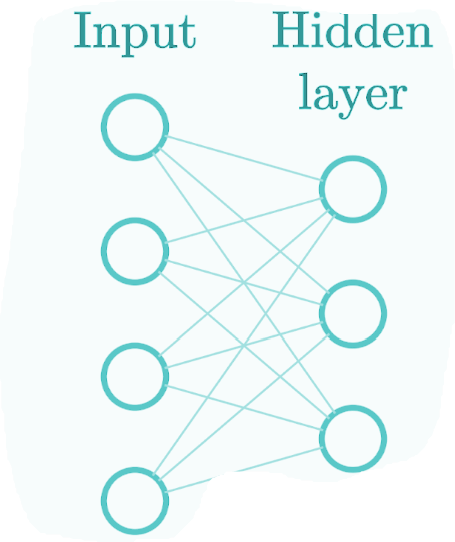
Samples (feature set data) get fed through the input, which does not change it in any way, to our
first hidden layer, which we can see has 3 sets of weights, with 4 values each.
Each of those 3 unique weight sets is associated with its distinct neuron. Thus, since we have 3
weight sets, we have 3 neurons in this first hidden layer. Each neuron has a unique set of weights,
of which we have 4 (as there are 4 inputs to this layer), which is why our initial weights have a
shape of ​ (3,4) ​ .
Now, we wish to add another layer. To do that, we must make sure that the expected input to
that layer matches the previous layer’s output. We have set the number of neurons in a layer by
setting how many weight sets and biases we have. The previous layer’s influence on weight sets
for the current layer is that each weight set needs to have a separate weight per input. This
means a distinct weight per neuron from the previous layer (or feature if we’re talking the
input). The previous layer has 3 weight sets and 3 biases, so we know it has 3 neurons. This then
means, for the next layer, we can have as many weight sets as we want (because this is how
many neurons this new layer will have), but each of those weight sets must have 3 discrete
weights.
To create this new layer, we are going to copy and paste our ​ weights​ a ​ nd ​ biases​ to ​ weights2
and ​ biases2​ , and change their values to new made up sets. Here’s an example:

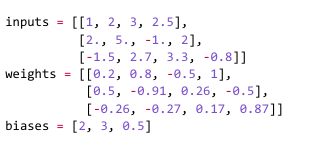
layer1_outputs  =  np.dot(inputs, np.array(weights).T)  + biases

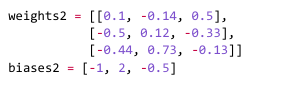

Next, we will now call ​ outputs ​ “ ​ layer1_ouputs ” ​ ​ :
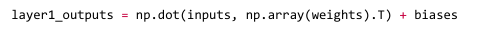
As previously stated, inputs to layers are either inputs from the actual dataset you’re training with
or outputs from a previous layer. That’s why we defined 2 versions of ​ weights ​ and ​ biases ​ but only
1 of ​ inputs ​ — because the inputs for layer 2 will be the outputs from the previous layer:

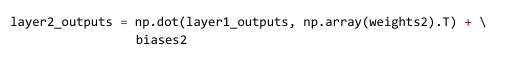
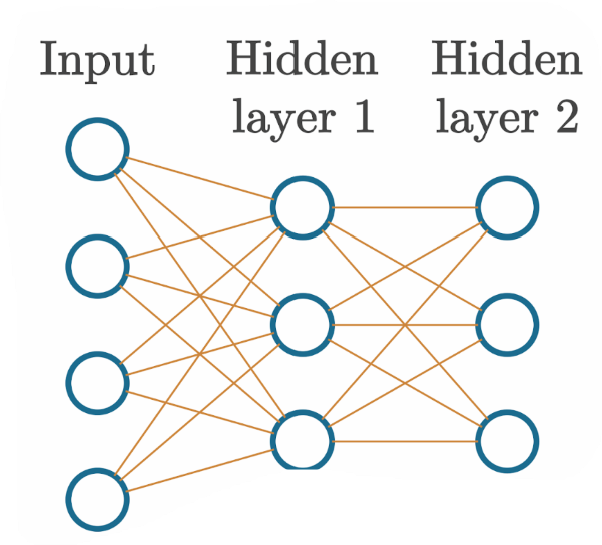
Figure B5: 4 features input into 2 hidden layers of 3 neurons each


In [1]:
import numpy as np

inputs = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

biases2 = [-1, 2, -0.5]

# Layer 1 output
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

# Layer 2 output
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [ ]:
### Training Data